#### Hill Climbing

In [96]:
# lets make an input of 5 cities [A,B,C,D,E] each city is encoded with one Letter
# An encoding is represented as a string eg 'ABCDE'
# cost is to be minimised and represented by a dict {AB:10,BC:30,CD:20,DE:15,AE:25}
# fitness is considered to be minimum cost considering (1/cost)
# Mutation is done by swapping
# termination is considered to be 100 evaluations or generations

import numpy as np
import matplotlib.pyplot as plt
def hillclimbing(init_ele,fitness_dict):
    generation = 1
    fitness = []
    fitness_2 = []
    while(generation<=10):
        value = mutate(init_ele)
        if(isFitter(value,init_ele,fitness_dict)==True):
            init_ele = value
            fitness.append(calculateFitness(init_ele,fitness_dict))
            fitness_2.append(calculateFitness(value,fitness_dict))
        else:
            fitness.append(calculateFitness(init_ele,fitness_dict))
            fitness_2.append(calculateFitness(value,fitness_dict))
        print('Generation {0} : child is {1} with fitness {2}'.format(generation,value,calculateFitness(value,fitness_dict)))
        generation = generation + 1
    fig, ax = plt.subplots(2,2)
    ax[0,0].scatter(list(range(1,11)),fitness)
    ax[0,0].plot(list(range(1,11)),fitness)
    
    ax[0,1].scatter(list(range(1,11)),fitness_2)
    ax[0,1].plot(list(range(1,11)),fitness_2)
   

    plt.show()
    
            
    

In [97]:
def mutate(init_ele):
    value_1 = 0
    value_2 = 0
    while(value_1 == value_2):
        value_1 = np.random.randint(0,len(init_ele)-1)
        value_2 = np.random.randint(0,len(init_ele)-1)
    B= list(init_ele)
    X= B[value_1]
    B[value_1]=B[value_2]
    B[value_2]=X
    new_init_ele = ''.join(B)
    return new_init_ele
    
    

In [98]:
def isFitter(value,init_ele,fitness_dict):
    if(calculateFitness(value,fitness_dict)>calculateFitness(init_ele,fitness_dict)):
        return True
    else:
        return False

In [99]:
def calculateFitness(x,fitness_dict):
    sum = 0
    val=''
    for i in range(0,len(x)-1):
        val = x[i]+x[i+1]
        sum = sum + fitness_dict[val] 
        val =''
    val2= x[len(x)-1]+x[0]
    sum = sum + fitness_dict[val2]
    val2=''
    fitness = 1/sum
    return fitness
    

Generation 1 : child is DBCAE with fitness 0.006024096385542169
Generation 2 : child is ADCBE with fitness 0.007352941176470588
Generation 3 : child is BACDE with fitness 0.007874015748031496
Generation 4 : child is ABDCE with fitness 0.00980392156862745
Generation 5 : child is CBDAE with fitness 0.0072992700729927005
Generation 6 : child is BADCE with fitness 0.007142857142857143
Generation 7 : child is DBACE with fitness 0.006756756756756757
Generation 8 : child is ACDBE with fitness 0.008264462809917356
Generation 9 : child is BADCE with fitness 0.007142857142857143
Generation 10 : child is ADBCE with fitness 0.007407407407407408


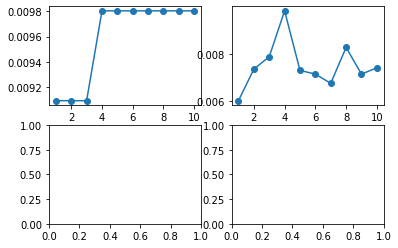

In [100]:
hillclimbing('ABCDE',{
    'AB':10,'AC':20,'AD':40,'AE':50,
    'BA':16,'CA':18,'DA':15,'EA':13,
    'BC':15,'BD':14,'BE':23,
    'CB':24,'DB':38,'EB':19,
    'CD':27,'CE':29,
    'DC':36,'EC':34,
    'DE':45,'ED':45
    
})

In [4]:
x='ABCDE'
for i in range(0,len(x)-1):
    print('distance of {0} to {1} and will check {2}'.format(x[i],x[i+1],x[i]+x[i+1]))
print('distance of {0} to {1} and will check {2}'.format(x[len(x)-1],x[0],x[len(x)-1]+x[0]))

distance of A to B and will check AB
distance of B to C and will check BC
distance of C to D and will check CD
distance of D to E and will check DE
distance of E to A and will check EA


In [10]:
np.random.randint(0,4)

1

In [12]:
A='ABCD'
x=A[0]
A[0]=A[1]
A[1]=x
A

TypeError: 'str' object does not support item assignment

In [16]:
B= list(A)
B
x= B[0]
B[0]=B[1]
B[1]=x
print(''.join(B))

BACD


In [17]:
A='BACD'
B==A

False

In [20]:
X=''.join(B)
X==A

True

In [25]:
1/2

0.5

In [60]:
1/0.006756756756756757

148.0

#### Using a Basic Evolutionary Algorithm to Solve a 0-1 Knapsack Problem

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def knapsack(max_cost,value_list,cost_list):
    History = []
    population = create_valid_randomised_population(max_cost,cost_list)
    count = 0 
    History.append(population)
    
    while(count<=100):
        parents_selected = selection_from_population(population,value_list)
        offspring = crossover_parents(parents_selected,value_list)
        offspring_mutated = mutate(offspring)
        population = offspring
        History.append(population)
        print('Best Fitness in Generation {0} is {1}'.format(count,max(calculate_Fitness(population,value_list))))
        count = count + 1
        
    answers = give_best_valid_each_generation(History,value_list,max_cost,cost_list)
    final_answers = []
    
    for i in answers :
        final_answers.append(i)
    
    final_fitness = calculate_Fitness(final_answers,value_list)
    index = final_fitness.index(max(final_fitness))
           
    print('final valid answer = {0} with fitness = {1}'.format(final_answers[index],max(final_fitness)))
    plt.figure()
    fitnesses = calculate_Fitness(answers,value_list)
    plt.scatter(list(range(1,103)),fitnesses)
    plt.plot(list(range(1,103)),fitnesses)
    plt.show()
        

In [3]:
def create_valid_randomised_population(max_cost,cost_list):
    count = 1
    population = []
    while(count <= 5):
        bits =''
        for i in range(0,100):
            bits = bits + str(np.random.randint(0,2))
        if(check_validity(bits,max_cost,cost_list) == True):
            count = count + 1
            population.append(bits)
    return population

In [4]:
def check_validity(bits,max_cost,cost_list):
    flag = False
    sums = 0
    for i in range(0,len(bits)):
        value = int(bits[i])
        sums = sums + cost_list[i]*value
    if(sums <= max_cost):
        return True
    else:
        return False
        
        

In [5]:
def selection_from_population(population,value_list):
    parents = []
    for i in range(1,6):
        parent_1 = population[np.random.randint(0,5)]
        parent_2 = population[np.random.randint(0,5)]
        if(calculate_Fitness([parent_1],value_list)[0]>calculate_Fitness([parent_2],value_list)[0]):
            parents.append(parent_1)
        else:
            parents.append(parent_2)
    return parents

In [6]:
def calculate_Fitness(values,value_list):
    fitness = []
    for i in values:
        sums = 0
        for j in range(0,len(i)):
            value_index = int(i[j])
            sums = sums + value_list[j]*value_index
        fitness.append(sums)
    return fitness

In [7]:
def crossover_parents(parents_selected,value_list):
    offspring = []
    print(parents_selected)
    for i in range(0,3):
        index_1 = np.random.randint(0,5)
        index_2 = np.random.randint(0,5)
        parent_1 = parents_selected[index_1]
        parent_2 = parents_selected[index_2]
        if(i==0 or i == 1):
            cross_over_point = np.random.randint(1,3)
            parent_1 = parent_1[0:cross_over_point] + parent_2[cross_over_point:]
            parent_2 = parent_2[0:cross_over_point] + parent_1[cross_over_point:]
        offspring.append(parent_1)
        offspring.append(parent_2)
    
    fitness = calculate_Fitness(offspring,value_list)
    index = fitness.index(min(fitness))
    offspring.remove(offspring[index])
    return offspring
    
    
        
    

In [8]:
def mutate(offspring):
    index = np.random.randint(0,5)
    value = offspring[index]
    offspring.remove(offspring[index])
    mutate_index = np.random.randint(0,3)
    if(value[mutate_index] == '1'):
        value = value[0:mutate_index] + '0' + value[mutate_index+1:]
    else:
        value = value[0:mutate_index] + '1' + value[mutate_index+1:]
    offspring.append(value)
    return offspring

In [9]:
def give_best_valid_each_generation(History,value_list,max_cost,cost_list) :
    best_values = []
    for i in History:
        corrected = []
        for j in i:
            if(check_validity(j,max_cost,cost_list)==True):
                corrected.append(j)
        if(len(corrected)>0):
            fitnesses = calculate_Fitness(corrected,value_list)
            index = fitnesses.index(max(fitnesses))
            best_values.append(corrected[index])
    return best_values
        
    

In [10]:
knapsack(50,[60,100,120],[10,20,30])

IndexError: list index out of range

In [11]:
def extract_data_from_file():
    file = open('output.txt','r')
    content = file.readlines()
    weights = []
    values = []
    max_cost = 0
    first_line = content[0].split(' ')
    for k in first_line:
        x=k.strip()
        if(x.isdigit()==True):
            max_cost = x
    for i in range(1,len(content)):
        data = content[i].split(' ')
        if('weight:' in data):
            for j in data:
                res = False
                value = j.strip()
                try:
                    float(value)
                    res = True
                except:
                    res = False
                if(res==True):
                    weights.append(value)
        if('value:' in data):
            for j in data:
                value = j.strip()
                if(value.isdigit()==True):
                    values.append(value)
    weights = [float(i) for i in weights]
    values = [int(i) for i in values]
    max_cost = float(max_cost)
    return weights,values,max_cost

In [12]:
def begin_knapsack_problem():
    weights,values,max_cost = extract_data_from_file()
    knapsack(max_cost,values,weights)

['1011111110101111110010000001111111011010001000011101100000111110001000000100100001010101100000110010', '1110001110000111011001010101010000111100110101111110110011101010010011001000100001101100000100001111', '0111001001000010011001110001101110100111001110101111011101110001111010000110000110110001000110010000', '1011111110101111110010000001111111011010001000011101100000111110001000000100100001010101100000110010', '1011111110101111110010000001111111011010001000011101100000111110001000000100100001010101100000110010']
Best Fitness in Generation 0 is 2971
['1011111110101111110010000001111111011010001000011101100000111110001000000100100001010101100000110010', '1111111110101111110010000001111111011010001000011101100000111110001000000100100001010101100000110010', '1011111110101111110010000001111111011010001000011101100000111110001000000100100001010101100000110010', '1011111110101111110010000001111111011010001000011101100000111110001000000100100001010101100000110010', '101111111010111111001000

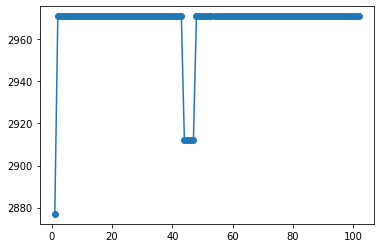

In [13]:
begin_knapsack_problem()